# Домашнее задание по теме «Классические модели ML»

В этом домашнем задании тебе нужно:
- применить ML-модели для задачи регрессии и объяснить их решения;
- самостоятельно реализовать kNN (бонусная задача).



## Подготовка

Импортируем необходимые библиотеки.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

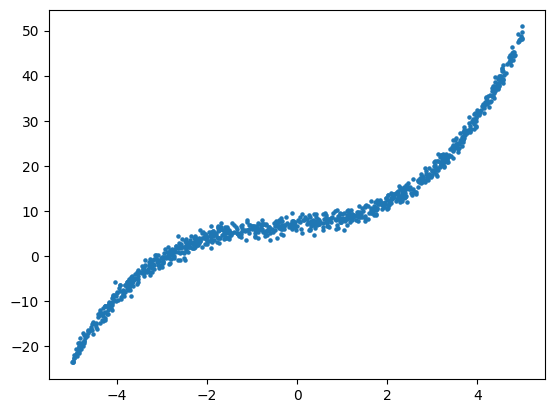

In [6]:
# Функция для создания нашего датасета
def generate_dataset(B, n):
    e = np.random.normal(0, 1, n)
    X = np.random.uniform(-5, 5, n)
    y = 0
    for i in range(len(B)):
        y += B[i] * X**i
    y += e
    return X, y

n = 1000
np.random.seed(123) # Фиксируем случайность генератора
B = [7, 1, 0.25, 0.25] # Задаём коэффициенты для сгенерированных данных
X, y = generate_dataset(B, n)

# Преобразуем X к табличному виду
X = X.reshape((-1, 1))

# Нарисуем, что получилось
plt.scatter(X, y, s=5)
plt.show()

Теперь разделим выборки на `train` и `test`. Это необходимо, чтобы продемонстрировать различия в работе моделей.

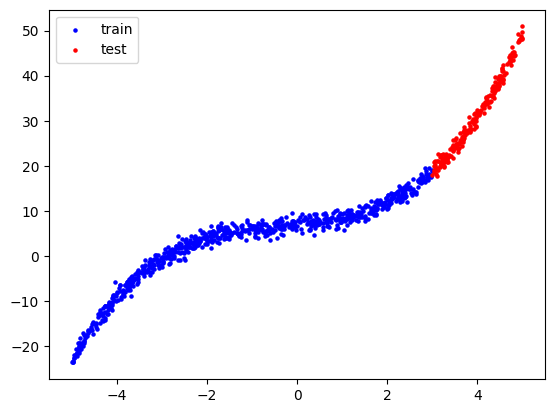

In [7]:
# Разделим их по переменной X. Пусть это будет число 3
mask = X<=3
X_train, y_train, X_test, y_test = X[mask], y[mask.ravel()], X[~mask], y[~mask.ravel()]
X_train = X_train.reshape((-1, 1))
X_test = X_test.reshape((-1, 1))

# Нарисуем, как будут выглядеть обучающий и тестовый датасеты
plt.scatter(X_train, y_train, c='blue', label='train', s=5)
plt.scatter(X_test, y_test, c='red', label='test', s=5)
plt.legend()
plt.show()

In [8]:
def visulize_regression(model, step=0.01):
  # Делаем «сетку» для предсказаний
  X_mesh = np.arange(X.min(), X.max(), step).reshape((-1, 1))
  # Делаем предсказание для сетки
  preds = model.predict(X_mesh)
  # Рисуем
  plt.plot(X_mesh, preds, c='orange', label='Regression')

def visualize_all(model, step=0.01):
  plt.scatter(X_train, y_train, c='blue', label='train', s=5)
  plt.scatter(X_test, y_test, c='red', label='test', s=5)
  visulize_regression(model)
  plt.legend()
  plt.show()

Проверим, что всё работает.

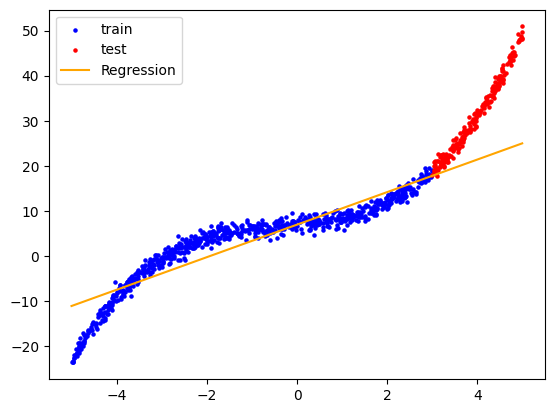

In [9]:
# Импортируем линейную модель
from sklearn.linear_model import LinearRegression
# Инициализируем
model = LinearRegression(n_jobs=-1)
# И обучим
model.fit(X_train, y_train)

# А теперь визуализируем всё
visualize_all(model)

Всё работает. Теперь попробуй решить задачи!

## Задача 1. Обучение разных моделей регрессии [6 баллов]

Тебе нужно обучить ML-модели и объяснить, почему получились такие предсказания. Не забывай, что модели обучены на подвыборке `train`, поэтому особое внимание удели интерпретации работы алгоритмов на `test`-подвыборке.

Используй модели:
1. Линейная регрессия.
2. SVM.
3. kNN.
4. Дерево решений.
5. Случайный лес.
6. Бустинг над деревьями.

Для каждой модели нужно выполнить следующие пункты:
1. Обучить модель регрессии на `train`-подвыборке. **[0,25 балла]**
2. Визуализировать регрессию и объяснить, почему получился такой результат. **[0,25 балла]**
3. Для каждого алгоритма один раз изменить параметры или, например, добавить полиномы, чтобы улучшить результат решения задачи. **[0,25 балла]**
4. Описать, что получилось. Если качество решения не удаётся улучшить простыми методами, объясни, с чем это связано. **[0,25 балла]**

> **Важно.** Для линейной регресии пункт 1 уже выполнен выше как пример, поэтому баллы за этот пункт не начисляются. Начинай сразу с пункта 2. За построение всех моделей, визуализацию и доработку ты можешь получить 0,75 + 1 + 1 + 1 + 1 + 1 = 5,75 балла.

В конце напиши выводы о преимуществах и недостатках каждой модели. **[0,25 балла]**

## Твой ответ на задачу 1

### Линейная регрессия

2. Почему получился такой результат?



линеная регрессия описывает зависимость в наших данных через линию. оно не может описать точнее, чем так, поэтому мы видим большой разброс между реальными и предсказанными данными


In [10]:
# 3. Что можно сделать, чтобы улучшить решение?

# чтобы исправить модель, мы будем использовать полиномиальную регрессию

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [12]:
poly_feature = PolynomialFeatures(degree=3)
X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.transform(X_test)


In [13]:
poly_linreg = LinearRegression()
poly_linreg.fit(X_train_poly, y_train)

LinearRegression()

In [14]:
y_pred_poly = poly_linreg.predict(X_test_poly)

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_feature.transform(X_plot)
y_plot_poly = poly_linreg.predict(X_plot_poly)


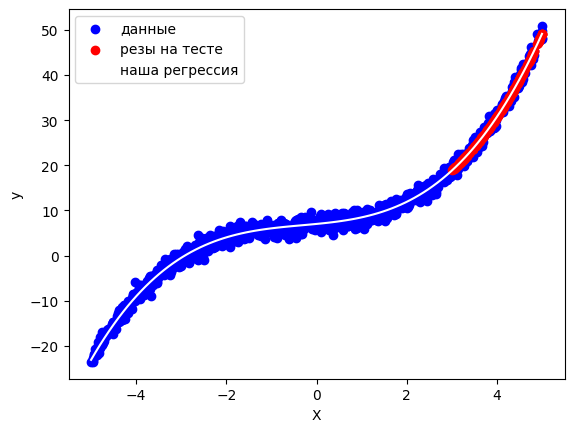

In [15]:
plt.scatter(X, y, color='blue', label='данные')
plt.scatter(X_test, y_pred_poly, color='red', label='резы на тесте')
plt.plot(X_plot, y_plot_poly, color='white', label='наша регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4. Что получилось после попытки улучшить решение?

полиномиальная регрессия идеально описала наши данные и предскащания теперь работают

### SVM

In [16]:
from sklearn.svm import SVR

In [17]:
# 1. Обучи модель
sv_model = SVR(kernel='rbf')
sv_model.fit(X_train, y_train)
y_pred_svr = sv_model.predict(X_test)

In [18]:
X_svr_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_pred_plot_svr = sv_model.predict(X_svr_plot)

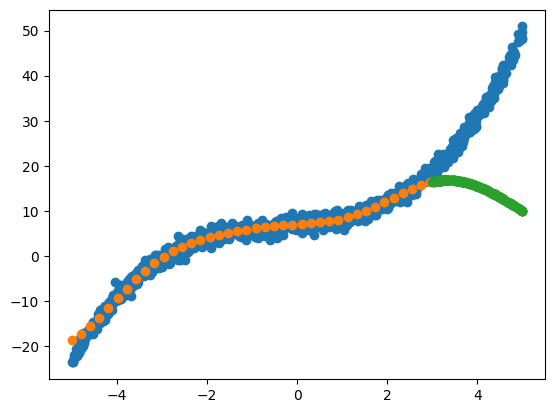

In [19]:
# 2. Сделай визуализацию
plt.scatter(x=X, y=y)
plt.scatter(x=X_svr_plot, y=y_pred_plot_svr)
plt.scatter(x=X_test, y=y_pred_svr)

2. Почему получился такой результат?



такой результат получился из за ядра в свр. у нас данные полиномальные, а по дефолту в свр стоит рбф. поэтому если мы поменяем ядро свр на poly все измениться в лучшую сторону. а пока что мы имеем переобученную моедль

In [20]:
sv_model = SVR(kernel='poly')
sv_model.fit(X_train, y_train)
y_pred_svr = sv_model.predict(X_test)

In [21]:
X_svr_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_pred_plot_svr = sv_model.predict(X_svr_plot)

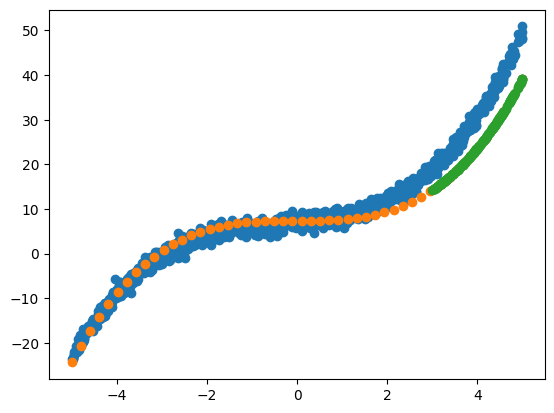

In [22]:
# 2. Сделай визуализацию
plt.scatter(x=X, y=y)
plt.scatter(x=X_svr_plot, y=y_pred_plot_svr)
plt.scatter(x=X_test, y=y_pred_svr)

4. Что получилось после попытки улучшить решение?

теперь свр лучше описывает данные, и признаков переобучения меньше. 

### kNN

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# 1. Обучи модель
knb = KNeighborsRegressor()
knb.fit(X_train, y_train)
y_pred_knb = knb.predict(X_test)


In [25]:
X_knb_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_knb_plot_pred = knb.predict(X_knb_plot)

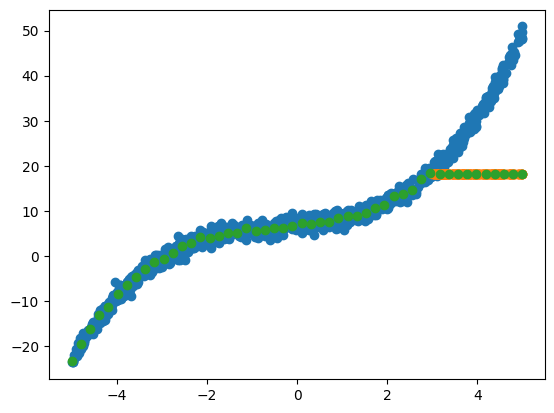

In [26]:
# 2. Сделай визуализацию
plt.scatter(x=X, y=y)
plt.scatter(X_test, y_pred_knb)
plt.scatter(x=X_knb_plot, y=y_knb_plot_pred)

2. Почему получился такой результат?



плохо настроили, поэтому алгос растерялся на тестах. то что он переобучился нельзя скзаать... потому что это же просто алгос которому надо дать норм гиперпаратеры

In [27]:
# 3. Что можно сделать, чтобы улучшить решение?
# добавим полиномиальные признаки

In [28]:
knb = KNeighborsRegressor()

poly_feature_knb = PolynomialFeatures(degree=3)
x_train_poly_knb = poly_feature_knb.fit_transform(X_train)
X_test_poly_knb = poly_feature_knb.transform(X_test)

knb.fit(x_train_poly_knb, y_train)

KNeighborsRegressor()

In [29]:
y_knb_poly_pred = knb.predict(X_test_poly_knb)

In [30]:
X_knb_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
X_knb_plot_poly = poly_feature_knb.transform(X_knb_plot)
y_knb_plot_poly_pred = knb.predict(X_knb_plot_poly)

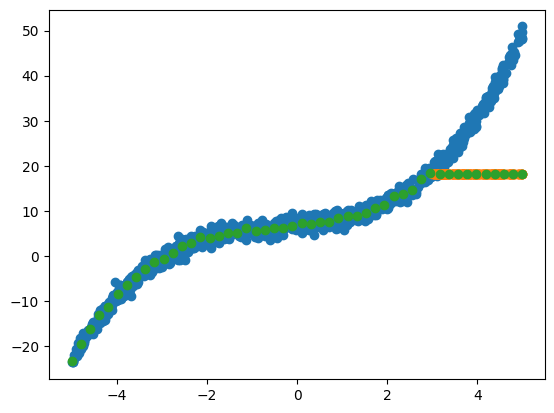

In [31]:

plt.scatter(x=X, y=y)
plt.scatter(X_test, y_knb_poly_pred)
plt.scatter(x=X_knb_plot, y=y_knb_plot_poly_pred)

4. Что получилось после попытки улучшить решение?

вообще ничего не случилось, все так же плохо. кнн не умеет экстраполировать зависимости на новые данные, поэтому его бестолково использовать тут. прорешав последний номер до меня дошло как на самом деле работает кнн... мы имеем ту прямую потому что он испоьзуя предикт выбирает самые верхние y из y_train и не больше, поэтому мы видим такую прикольную прямую


### Дерево решений

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
# 1. Обучи модель
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [34]:
X_tree_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_tree_plot_pred = tree.predict(X_tree_plot)

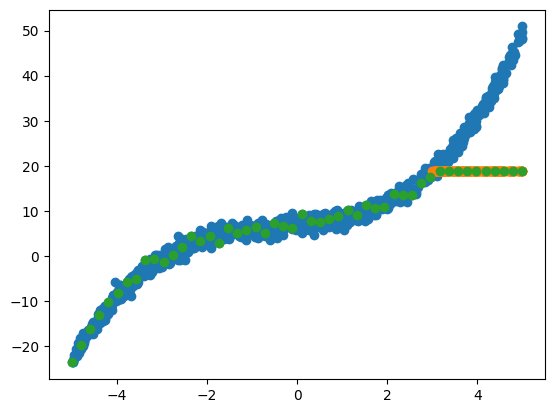

In [35]:
# 2. Сделай визуализацию
plt.scatter(X, y)
plt.scatter(X_test, y_pred_tree)
plt.scatter(X_tree_plot, y_tree_plot_pred)

2. Почему получился такой результат?



мы имеем обычный  алгоритм, он не умеет предсказывать значения и с данными ничего не делает, лишь теряется

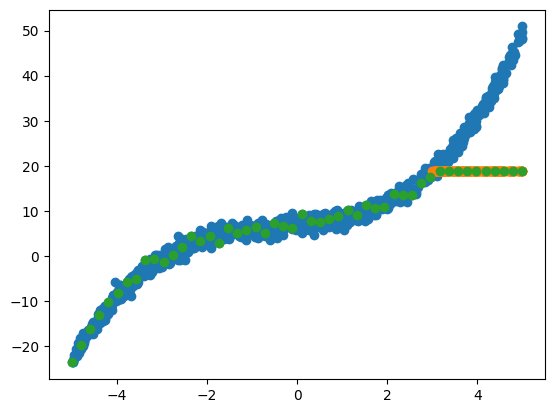

In [36]:
# 3. Что можно сделать, чтобы улучшить решение?
# ничего нельзя сделать это бесполезно
# 1. Обучи модель
tree = DecisionTreeRegressor(max_depth=52)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
X_tree_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_tree_plot_pred = tree.predict(X_tree_plot)
plt.scatter(X, y)
plt.scatter(X_test, y_pred_tree)
plt.scatter(X_tree_plot, y_tree_plot_pred)

4. Что получилось после попытки улучшить решение?

да ничего не произойдет. меняя паарметры или доавляя новые фичи мы результат не изменим

### Случайный лес

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# 1. Обучи модель
rm = RandomForestRegressor()
rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)

In [39]:
# 2. Сделай визуализацию
X_rm_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_rm_plot = rm.predict(X_rm_plot)

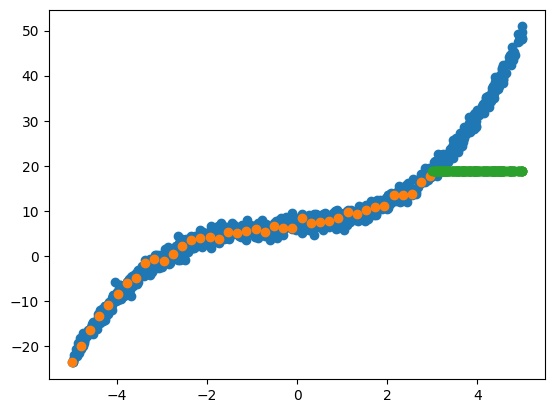

In [40]:
plt.scatter(X, y)
plt.scatter(X_rm_plot, y_rm_plot)
plt.scatter(X_test, y_pred)

2. Почему получился такой результат?



аналогично с обычным деревом решений. данные скушал а предсказать по новым ничего не может потому что это так же обычный алгос

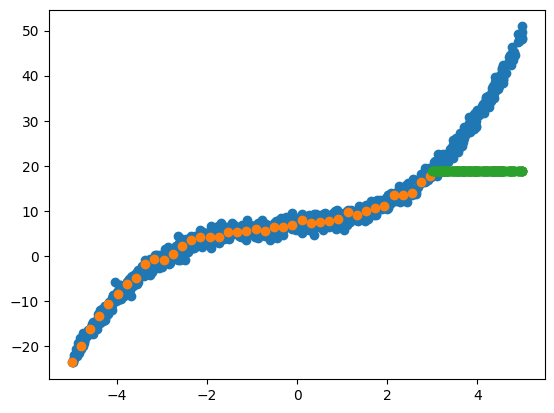

In [41]:
# 3. Что можно сделать, чтобы улучшить решение?
# ничего все так же плохо будет но попробуем задать чуть дургие параметры 
rm = RandomForestRegressor(max_depth=10)
rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)
X_rm_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_rm_plot = rm.predict(X_rm_plot)
plt.scatter(X, y)
plt.scatter(X_rm_plot, y_rm_plot)
plt.scatter(X_test, y_pred)


4. Что получилось после попытки улучшить решение?

все бесполезно. модель как не умела предсказывать так и не умеет


### Бустинг над деревьями

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
# 1. Обучи модель
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_gbr_fit = gbr.predict(X_test)

In [44]:
# 2. Сделай визуализацию
X_gbr_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_gbr_plot = gbr.predict(X_gbr_plot)

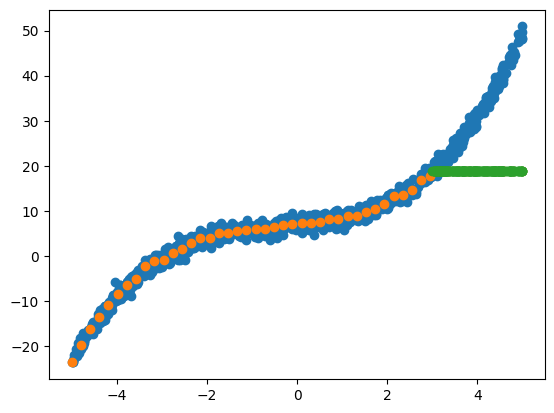

In [45]:
plt.scatter(X, y)
plt.scatter(X_gbr_plot, y_gbr_plot)
plt.scatter(X_test, y_gbr_fit)

2. Почему получился такой результат?



все плохо

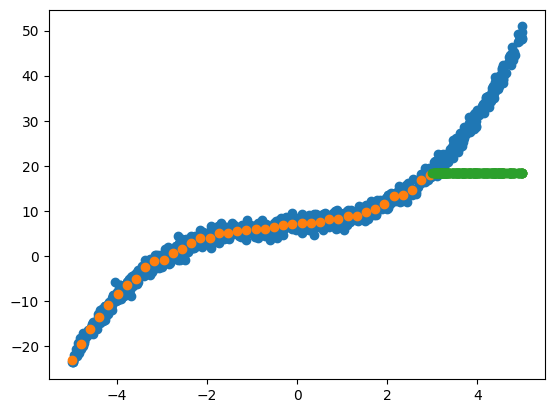

In [46]:
# 3. Что можно сделать, чтобы улучшить решение?
# ничего я не умею работать с временными рядами
gbr = GradientBoostingRegressor(n_estimators=52)
gbr.fit(X_train, y_train)
y_gbr_fit = gbr.predict(X_test)
# 2. Сделай визуализацию
X_gbr_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_gbr_plot = gbr.predict(X_gbr_plot)
plt.scatter(X, y)
plt.scatter(X_gbr_plot, y_gbr_plot)
plt.scatter(X_test, y_gbr_fit)

4. Что получилось после попытки улучшить решение?

все также плохо то можно предсказать даже не пытаясь

### Выводы

Какие выводы можно сделать о рассмотренных моделях?




полиномиальная регрессия для этих данных была самой крутой, но слегка переобучилась. свр круто показал себя и не переобучился. все отасльные... ужас. они хавают данные из трейна, а потом когда даешь пытаешься предсказать что то на тестовой выборке они просто ничего не могут, не щнаю почему эти модели очень крутые для табличных данных и для задачи регрессии.. но пока вижу что ничего не работает для деревянных моделей


> **Примечание.** Скорее всего, у тебя не получилось cделать хорошие предсказания деревянными моделями (дерево решений, случайный лес, бустинг над деревьями) и kNN. При этом в лекции и семинаре говорилось, что бустинг — сильнейшая модель для табличных данных. Как работать с такого рода зависимостями деревянными моделями, разберём в теме «Временные ряды».

## Задача 2. Ансамблирование [4 балла]

Чтобы частично решить эту проблему прямо сейчас, можно построить ансамбль моделей. Для этого нужно взять несколько моделей и усреднить их предсказания. Можно взять не среднее, а с некоторыми весами, которые подбираются ровно так же, как и гиперпараметры моделей.

Тебе нужно:
1. Посмотреть докумментацию [VotingRegressor](https://scikit-learn.ru/stable/modules/generated/sklearn.ensemble.VotingRegressor.html). **[0 баллов]**
2. Создать модель VotingRegressor, состоящую из трёх используемых ранее моделей **[1 балл]**, при этом:
  * включить линейную регерессию с кубическим полиномом;
  * включить деревянную модель или kNN;
  * добавить третью модель на своё усмотрение.
3. Описать, что получилось. **[1 балл]**
4. Изменить весовую схему в VotingRegressor в пользу линейной регрессии. **[1 балл]**
5. Описать, что получилось. **[1 балл]**

> **Примечание.** Если включать некачественно работающую модель в ансамбль (деревянные модели или kNN), то совокупный результат будет хуже, чем для линейной регрессии с полиномом третьей степени. Но смысл этой задачи — показать, как простыми методами можно делать ансамбль моделей и что часто ансамбль позволяет улучшить решение.


### Твой ответ на задачу 2

In [47]:
# 1. Импортируй  VotingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline

In [48]:
# 2. Сделай линейную модель с полиномом третьей степени
lin_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
dtr = DecisionTreeRegressor()
svr = SVR()

# Собери VotingRegressor из линейной регрессии и деревянной модели или kNN. Третью модель выбери самостоятельно
vreg = VotingRegressor([
    ("lin_model", lin_model),
    ("dtr", dtr) ,
    ("svr", svr)
], n_jobs=-1)

In [49]:
# 3. Обучи ансамбль
vreg.fit(X_train, y_train)

VotingRegressor(estimators=[('lin_model',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=3)),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('dtr', DecisionTreeRegressor()), ('svr', SVR())],
                n_jobs=-1)

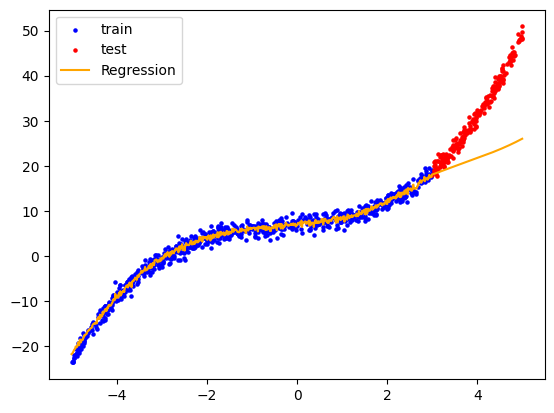

In [50]:
# 4. Нарисуй, что получилось
visualize_all(vreg)

3. Стало ли лучше предсказание относительно деревянной модели? Почему?

In [51]:
# 5. Измени весовую схему
# Скопируй твой код выше и добавь весовую схему, где вес существенно больше 0,33 присваивается линейной регерссии
# Сделай линейную модель с полиномом 3-й степени
lin_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
dtr = DecisionTreeRegressor()
svr = SVR()

# Собери VotingRegressor из линейной регрессии и деревянной модели или kNN. Третью модель выбери самостоятельно
vreg = VotingRegressor([
    ("lin_model", lin_model),
    ("dtr", dtr) ,
    ("svr", svr)
], n_jobs=-1, weights=(0.6, 0.3, 0.1))

In [52]:
# 6. Обучи модель
vreg.fit(X_train, y_train)

VotingRegressor(estimators=[('lin_model',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=3)),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('dtr', DecisionTreeRegressor()), ('svr', SVR())],
                n_jobs=-1, weights=(0.6, 0.3, 0.1))

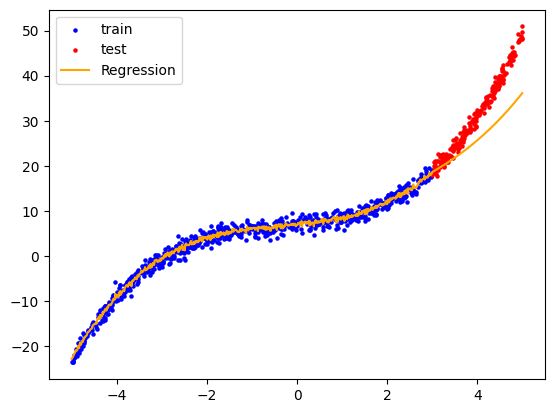

In [53]:
# 7. Нарисуй, что получилось
visualize_all(vreg)

5. Что ты видишь? В чём смысл ансамблирования моделей? Удаётся ли одним моделям хотя бы частично компенсировать недостатки других моделей?

да, удается. линейная регрессия компенсирует бесполезность деревяшек


## Задача 3. Самописный kNN [2 дополнительных балла]

Тебе необходимо самостоятельно реализовать алгоритм k ближайших соседей.

Для поиска ближайших соседей существует несколько алгоритмов, но тебе необходимо будет реализовать самый простой вариант — вычисление расстояний между всеми наблюдениями `train`- и `test`-выборок.

Это алгоритмически сложно, но на маленькой выборке посчитать это не составит труда.

Проверить работоспособность алгоритма нужно на нашем сгенерированном датасете. Но kNN не очень хорошо предсказывает точки за пределами значений `train`-подвыборки. Поэтому, чтобы проверить работоспособность алгоритма, сделай разбиение на `train` и `test` иначе — всё перемешаем и случайно разделим выборки.

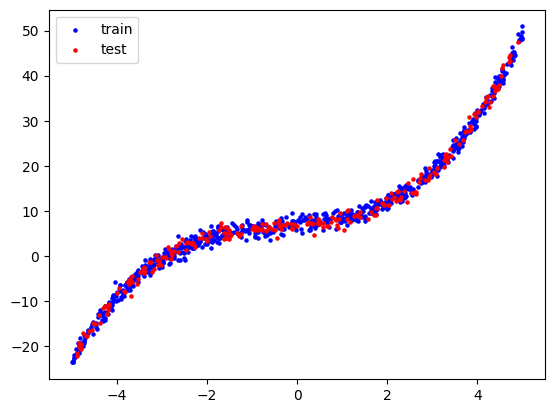

In [54]:
from sklearn.model_selection import train_test_split
# Делаем новое разбиение
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Нариcуем
plt.scatter(X_train, y_train, c='blue', label='train', s=5)
plt.scatter(X_test, y_test, c='red', label='test', s=5)
plt.legend()
plt.show()

Теперь можно приступать к реализации kNN.

Что тебе нужно сделать:
1. Реализовать класс kNN **[1,5 балла]**, который:
  * При инициализации принимает число соседей.
  * Считает евклидову меру попарно между всеми наблюдениями `train` и `test`. Хорошо, если векторизуешь, но можно и в цикле. На выходе должна быть матрица размерности `len(X_train)` на `len(X_test)` или наоборот. Зависит от того, в каком порядке ты подашь их функции вычисления расстояния.
  * Содержит метод вычисления ближайших соседей для каждого наблюдения.
  * Содержит метод `fit`, который просто запоминает `train`-данные.
  * Содержит метод `predict` для предсказания.

2. Обучи модель, получи предсказания и нарисуй, что у тебя получилось. Все предсказания должны лежать примерно на нашей зависимости. **[0,5 балла]**

**[Евклидово расстояние](https://habr.com/ru/articles/579914/)** — мера расстояния между точками. По сути это просто длина отрезка между двумя точками.

В n-мерном пространстве его формула выглядит следующим образом:
$$ d = \sqrt{Σ_{i=1}^n(x_i-y_i)^2}.$$

Корень можно не считать. Это монотонное преобразование, а значит, оно не будет изменять упорядоченность точек. То есть ближайшие точки с корнем и без корня не изменятся. А вычислительная сложность без корня будет чуть ниже.

### Твой ответ на задачу 3

In [65]:
import numpy as np


class kNN:
  def __init__(self, n_count):
    self.n_count = n_count

  @staticmethod # Статичный метод обозначает, что он не обращается к self. Здесь нам не надо обращаться к self для вычисления расстояний
  def euclidean_distance(A: np.ndarray, B: np.ndarray):
    data = []
    for i in range(len(A)):
      line = []
      for j in range(len(B)):
        f = A[i]
        s = B[j]
        d = sum([(f[k] - s[k]) ** 2 for k in range(len(f))]) ** 0.5
        line.append(d)
      data.append(line)
    return np.array(data)


  def get_least_k(self, X):
    dists = self.euclidean_distance(X_test, self.X_train) # Считаем расстояния
    return np.argpartition(dists, self.n_count, axis=1)[:, :self.n_count] # Выбираем k ближайших индексов для каждого наблюдения. Тебе поможет np.argpartition. np.argsort не подойдёт, потому что сортирует всё, а нам нужно только top k

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    top_k = self.get_least_k(X_test) # Получаем топ индексов с наименьшими расстояниями
    predictions = np.mean(self.y_train[top_k], axis=1)
    return predictions

In [66]:
# 2. Обучи модель
my_knn = kNN(5)
my_knn.fit(X_train, y_train)

In [67]:
# 3. Получи предсказания
y_pred_my_knn = my_knn.predict(X_test)
X_my_knn_plot = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_pred_plot = my_knn.predict(X_my_knn_plot)

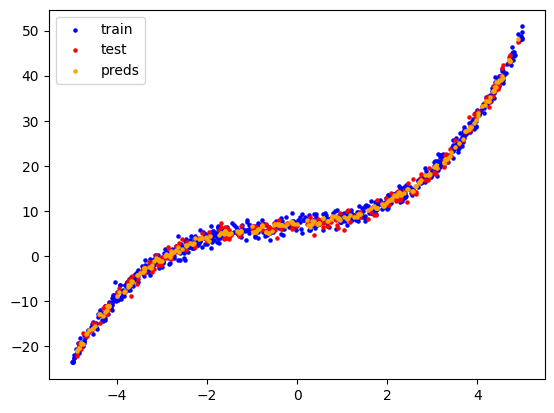

In [68]:
# 4. Нариcуй, что получилось
plt.scatter(X_train, y_train, c='blue', label='train', s=5)
plt.scatter(X_test, y_test, c='red', label='test', s=5)
plt.scatter(X_test, y_pred_my_knn, c='orange', label='preds', s=5)
plt.legend()
plt.show()